In [ ]:
#Dogman

In [11]:
import pandas as pd
import folium


In [7]:
df = pd.read_csv('F:\\d10\\Projects\\bigfoots-ufos-ghosts-oh-my\\data\\dogman_sightings.csv')

In [8]:
df.head()

,state,state_abbrev,location,longitude,latitude,date,description,location_2
0,Canada,Canada,Alberta,-116.576504,53.933271,NaN,About three years ago i encountered what I cou...,POINT(-116.5765035 53.9332706)
1,Canada,Canada,Deadwood Alberta,-117.458219,56.740963,NaN,I came across another report of a bipedal cani...,POINT(-117.458219 56.740963)
2,Canada,Canada,Deadwood Alberta,-117.458219,56.740963,NaN,I received a report about an unusual wolf/wolf...,POINT(-117.458219 56.740963)
3,Canada,Canada,Deadwood Alberta,-117.458219,56.740963,NaN,In this report a husband and wife were out cro...,POINT(-117.458219 56.740963)
4,Canada,Canada,Gillam Manitoba,-94.774844,56.333410,NaN,I saw something that put a big scare into me. ...,POINT(-94.7748443 56.33341)


In [9]:
cleaned_df = df.dropna(subset=['latitude', 'longitude'])


In [12]:
cleaned_df = df.dropna(subset=['latitude', 'longitude'])
# 200 points at first because computer froze last time 
num_rows = min(2000, len(cleaned_df))


if not cleaned_df.empty:
    first_point = cleaned_df.iloc[0]
    m = folium.Map(location=[first_point['latitude'], first_point['longitude']], zoom_start=5)

    # 1st 200 rows to be marked
    for index, row in cleaned_df.iloc[:num_rows].iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)

  

    
    display(m)
else:
    print("you messed up, buddy.")

In [14]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seanm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seanm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seanm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
df.dropna(subset=['description'], inplace=True)

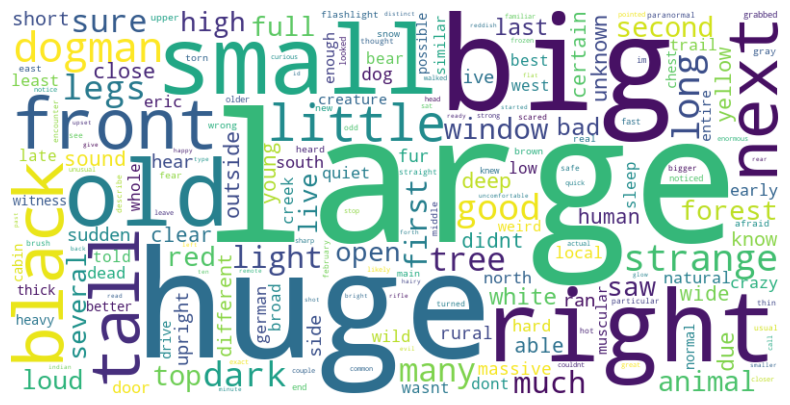

In [17]:
def preprocess_text(text):
    
    if pd.isnull(text):
        text = ''  
    else:
        text = str(text)  
    
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def extract_adjectives(tokens):
    tagged = nltk.pos_tag(tokens)
    adjectives = [word for word, tag in tagged if tag in ('JJ', 'JJR', 'JJS')]
    return adjectives

def generate_word_cloud(adjectives):
    text = ' '.join(adjectives)
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



all_adjectives = []

for index, row in df.iterrows():
    text = row['description']  
    tokens = preprocess_text(text)
    adjectives = extract_adjectives(tokens)
    all_adjectives.extend(adjectives)

generate_word_cloud(all_adjectives)